<h1>Backtesting framework for automated strategies</h1>

<h1>Summary</h1>
<p>This project aims to build a backtesting framework for systematically built portfolios of stocks and options. Our general strategy is:
<ol>
<li>Automated exploratory data analysis and feature engineering (features derived from price, volume, lags with high autocorrelation, historical volatility, Natural Language Processing for sentiment analysis of unlabelled financial news data, etc.)</li>
<li>Predict the stock price for a number of days in the future using linear regression with the features from the previous step</li>
<li>Build a portfolio by buying or selling stocks and options if the forecast suggests a certain strategy will produce positive returns. E.g. long the stock and short a call in a covered call strategy.</li>
</ol>
At the moment, we only build portfolios of covered calls for a single symbol in a given time period.
</p>


In [1]:
# Import our classes
from backtesting import *
from features import *

# Create backtest with news sentiment features
bt = Backtest(asset = "stock", asset_id = "GOOGL", target="Close", period="max", days_to_pred = 3, num_lag_features = 11, hist_start_date = "2015-12-21", hist_end_date="2016-02-01")

# Build and test covered call portfolio from start_date (default pd.to_datetime("2022-06-06", format="%Y-%m-%d"))
bt.test_systematic_portfolio()

By investing $36.68949890136719 in GOOGL using the covered call strategy between 2016-01-25 and 2016-01-27, the portfolio makes $16.79542081953221 - a 45.78% return.


<p>In practice, the returns would be significantly lower due to the transaction costs. We, however, do not have access to that information.</p>

<h1>Additional functionalities</h1>
<p>We visualize the backtest as follows.</p>

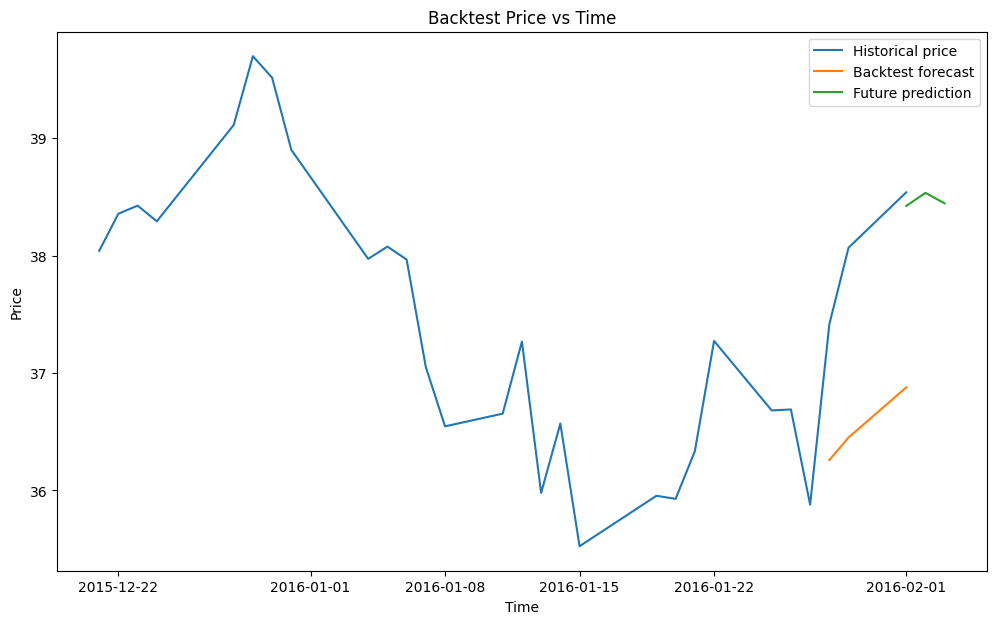

In [2]:
# Set up a figure
bt.create_ax_fig()
# Plot historical stock price
bt.plot_historical()
# Plot prediction on same plot as historical price for visual comparison
bt.plot_backtest()
# Plot future prediction on same plot
bt.plot_future_prediction()
# Call plt.show()
bt.plot_all()

<p> The reason the curves do not match exactly is that the features and the target are standardized using their mean and standard deviation on the training period to improve the learning, and we subsequently perform an inverse transformation still using the training period means and standard deviations.</p>

<p>The mean squared error on the test data is obtained by calling the score() function on the Backtest object. It can be useful when comparing two different models, for instance the linear regression with or without the financial news sentiment analysis feature. We also plan to implement other relevant metrics such as the sharp ratio.</p>

In [3]:
# Print MSE on test set
bt.score()

MSE is 1388.51465707896


<p> We compute and plot the Value-at-Risk (VaR) as follows. </p>

Latest 95% VaR is 5.96


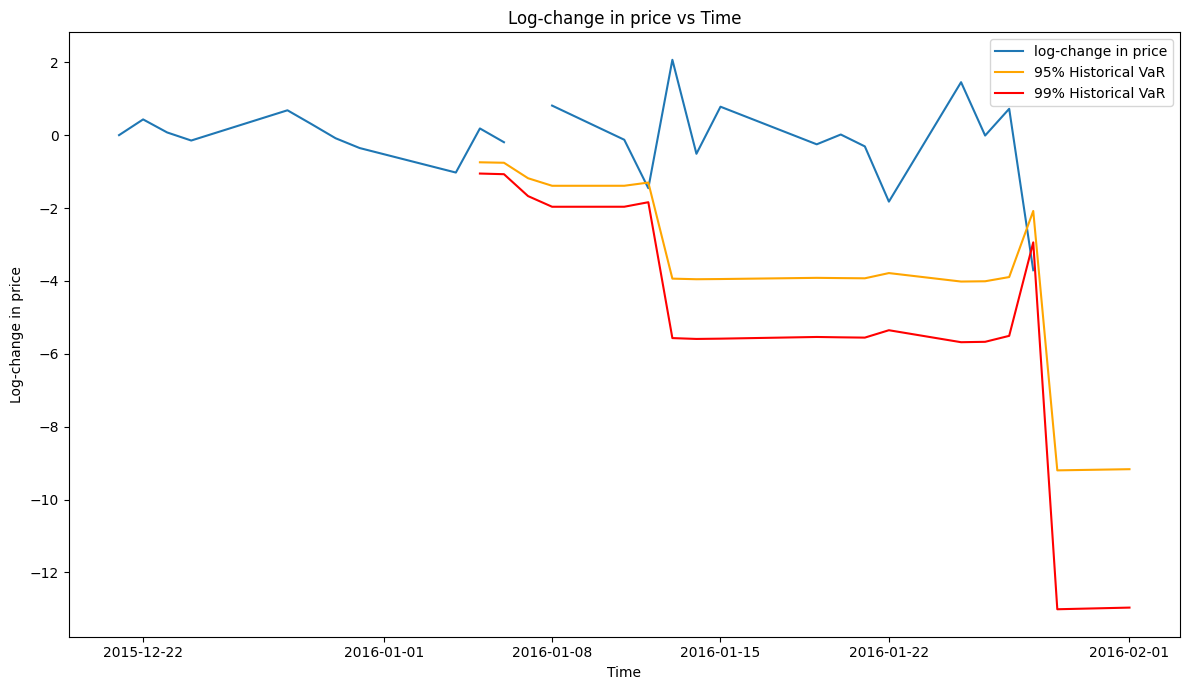

In [4]:
# Compute VaR
v = VaR(bt.price)
v.get_single_stock_VaR()
# Plot log change and VaR
v.plot_log_change_and_VaR()

<p>In the next cell, we compute the historical volatility.</p>

Lastest historical volatility is 17.39%


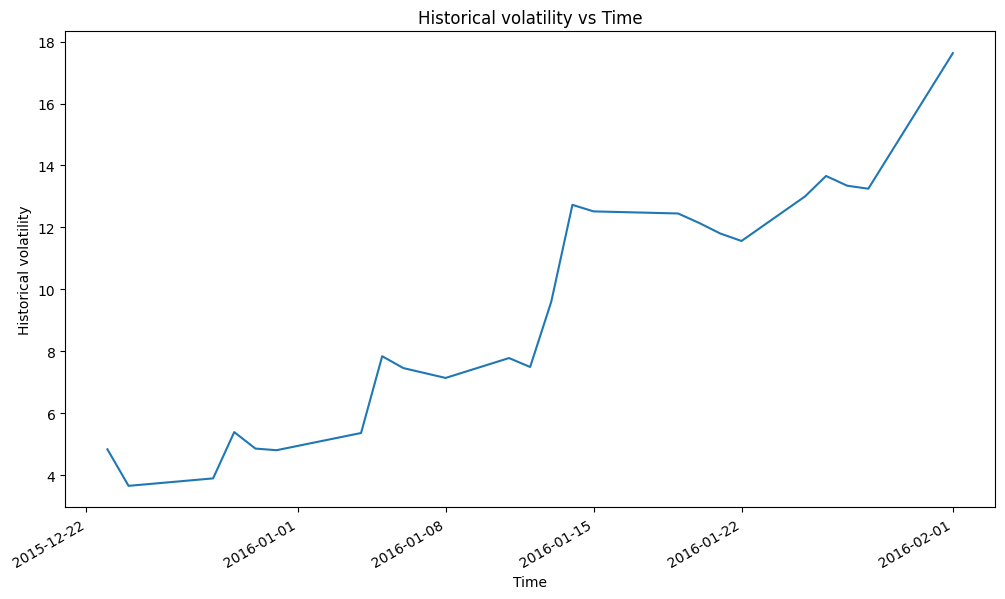

In [5]:
# Compute and plot historical volatility:
vol = Volatility(bt.price)
print("Lastest historical volatility is {:.2f}%".format(vol.get_historical_volatility()))
vol.plot_historical_volatility()

<p>In the automated feature engineering, we select high autocorrelation lags of the price and other features (volume, volatility, rolling averages and standard deviations of features, percentage changes, direction, news sentiment, etc.) which are highly correlated with the target variable. The next cell produces a visualization of these correlations.</p>

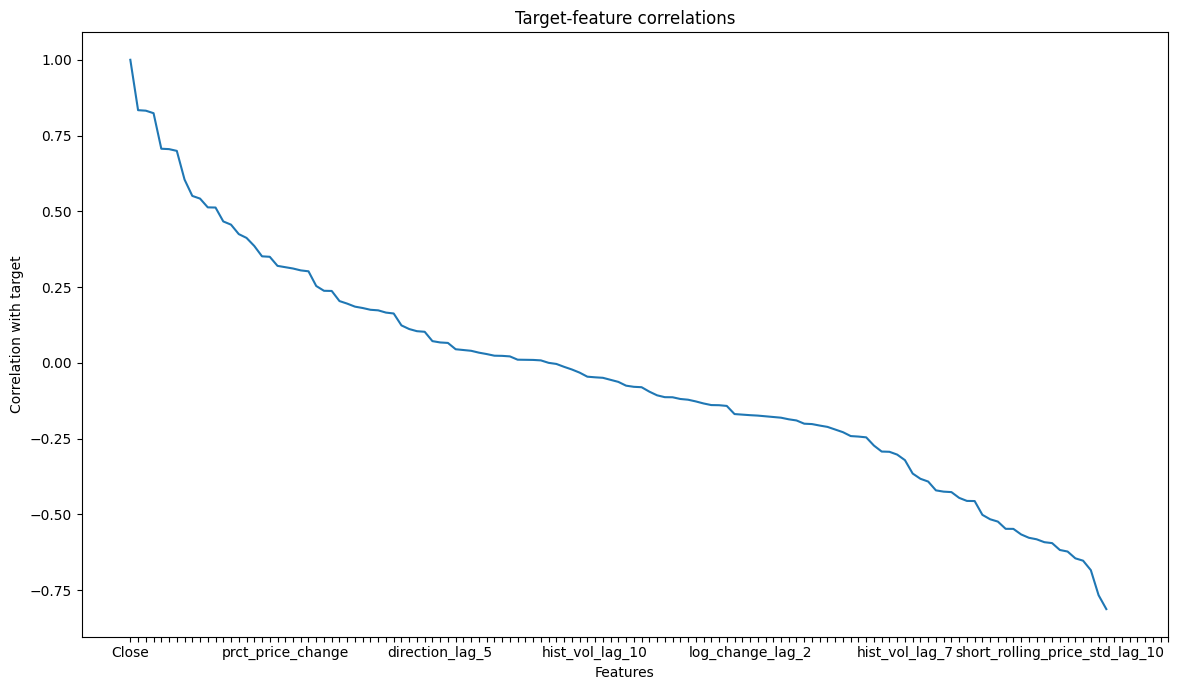

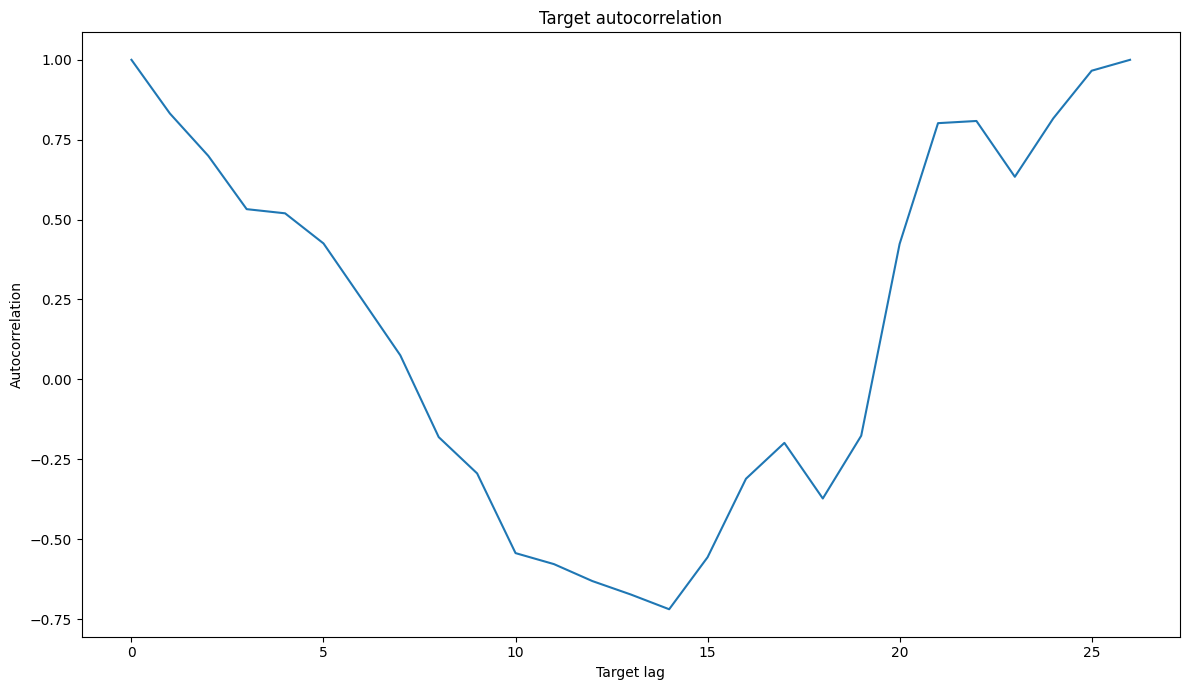

In [6]:
# Compute Correlation and autocorrelation
bt.compute_corr()
bt.plot_corr()
bt.compute_autocorr()
bt.plot_autocorr()

<p>Given the market price of an option, we compute the implied volatility as follows.</p>

In [7]:
print("Implied Volatility is {:.2f}%".format(100*vol.get_implied_volatility(S_0=100, OP_obs=1, K=100, T=30, r=0.05, option_type = "call")))

Implied Volatility is 6.81%
